In [169]:
import pandas as pd

In [171]:
import matplotlib.pyplot as plt

In [173]:
from glob import glob

In [175]:
glob('/Users\\Ali Alnuwaktha/Downloads/*.csv')

['/Users\\Ali Alnuwaktha/Downloads\\1_gecco2018_water_quality.csv',
 '/Users\\Ali Alnuwaktha/Downloads\\all_flights_data_2025_02_26 (1).csv',
 '/Users\\Ali Alnuwaktha/Downloads\\all_flights_data_2025_02_26 (2).csv',
 '/Users\\Ali Alnuwaktha/Downloads\\all_flights_data_2025_02_26.csv',
 '/Users\\Ali Alnuwaktha/Downloads\\Austin_Animal_Center_Outcomes_20250217.csv',
 '/Users\\Ali Alnuwaktha/Downloads\\average-height-by-year-of-birth.csv',
 '/Users\\Ali Alnuwaktha/Downloads\\cats (1).csv',
 '/Users\\Ali Alnuwaktha/Downloads\\cats.csv',
 '/Users\\Ali Alnuwaktha/Downloads\\clean_data.csv',
 '/Users\\Ali Alnuwaktha/Downloads\\Clean_dog.csv',
 '/Users\\Ali Alnuwaktha/Downloads\\co-current.csv',
 '/Users\\Ali Alnuwaktha/Downloads\\coffee_shop_sample.csv',
 '/Users\\Ali Alnuwaktha/Downloads\\crude_oil_import_prices.csv',
 '/Users\\Ali Alnuwaktha/Downloads\\csv (1).csv',
 '/Users\\Ali Alnuwaktha/Downloads\\csv.csv',
 '/Users\\Ali Alnuwaktha/Downloads\\fifa_ranking_2022-10-06.csv',
 '/Users\\Ali 

In [177]:
water_df = pd.read_csv('/Users\\Ali Alnuwaktha/Downloads\\1_gecco2018_water_quality.csv')

In [179]:
water_df = water_df.drop(['Unnamed: 0'], axis =1)

In [181]:
water_df

,Time,Tp,Cl,pH,Redox,Leit,Trueb,Cl_2,Fm,Fm_2,EVENT
0,2016-08-03 11:49:00,6.5,0.17,8.36,749.0,211.0,0.011,0.118,1677.0,695.0,False
1,2016-08-03 11:50:00,6.5,0.17,8.36,749.0,211.0,0.011,0.118,1561.0,696.0,False
2,2016-08-03 11:51:00,6.5,0.17,8.35,749.0,211.0,0.011,0.117,1581.0,696.0,False
3,2016-08-03 11:52:00,6.5,0.17,8.35,749.0,211.0,0.011,0.118,1579.0,693.0,False
4,2016-08-03 11:53:00,6.5,0.17,8.35,749.0,211.0,0.011,0.118,1567.0,689.0,False
...,...,...,...,...,...,...,...,...,...,...,...
139561,2016-11-08 08:50:00,10.1,0.16,8.41,762.0,189.0,0.023,0.105,1799.0,924.0,False
139562,2016-11-08 08:51:00,10.1,0.17,8.41,762.0,190.0,0.022,0.106,1835.0,927.0,False
139563,2016-11-08 08:52:00,10.1,0.17,8.41,762.0,190.0,0.022,0.106,1807.0,924.0,False
139564,2016-11-08 08:53:00,10.1,0.17,8.41,762.0,190.0,0.022,0.106,1799.0,930.0,False


In [183]:
import seaborn as sns

# Exploring the realtionships between variables

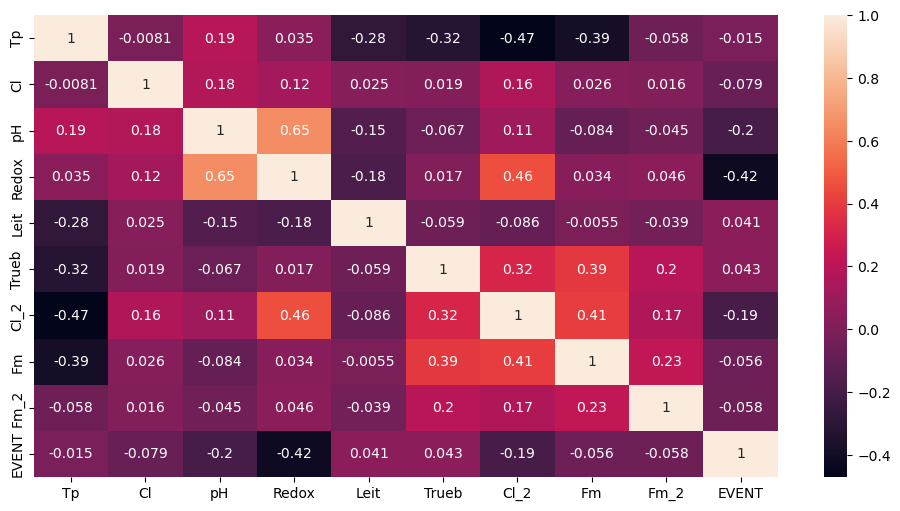

In [188]:
plt.figure(figsize=(12, 6))
water_cor = water_df.corr(numeric_only=True)
sns.heatmap(water_cor , annot=True);


# Cleaning the dataset

In [190]:
water_df.dropna(inplace=True)
water_df['Time'] = pd.to_datetime(water_df['Time'])
water_df['Date'] = water_df['Time'].dt.date
water_df['Time_only'] = water_df['Time'].dt.time
water_df['Month'] = water_df['Time'].dt.month
water_df['Hours'] = water_df['Time'].dt.hour
water_df['Day of week'] = water_df['Time'].dt.day_name()

In [192]:
water_df.head()

,Time,Tp,Cl,pH,Redox,Leit,Trueb,Cl_2,Fm,Fm_2,EVENT,Date,Time_only,Month,Hours,Day of week
0,2016-08-03 11:49:00,6.5,0.17,8.36,749.0,211.0,0.011,0.118,1677.0,695.0,False,2016-08-03,11:49:00,8,11,Wednesday
1,2016-08-03 11:50:00,6.5,0.17,8.36,749.0,211.0,0.011,0.118,1561.0,696.0,False,2016-08-03,11:50:00,8,11,Wednesday
2,2016-08-03 11:51:00,6.5,0.17,8.35,749.0,211.0,0.011,0.117,1581.0,696.0,False,2016-08-03,11:51:00,8,11,Wednesday
3,2016-08-03 11:52:00,6.5,0.17,8.35,749.0,211.0,0.011,0.118,1579.0,693.0,False,2016-08-03,11:52:00,8,11,Wednesday
4,2016-08-03 11:53:00,6.5,0.17,8.35,749.0,211.0,0.011,0.118,1567.0,689.0,False,2016-08-03,11:53:00,8,11,Wednesday


# Does Time effect water quality

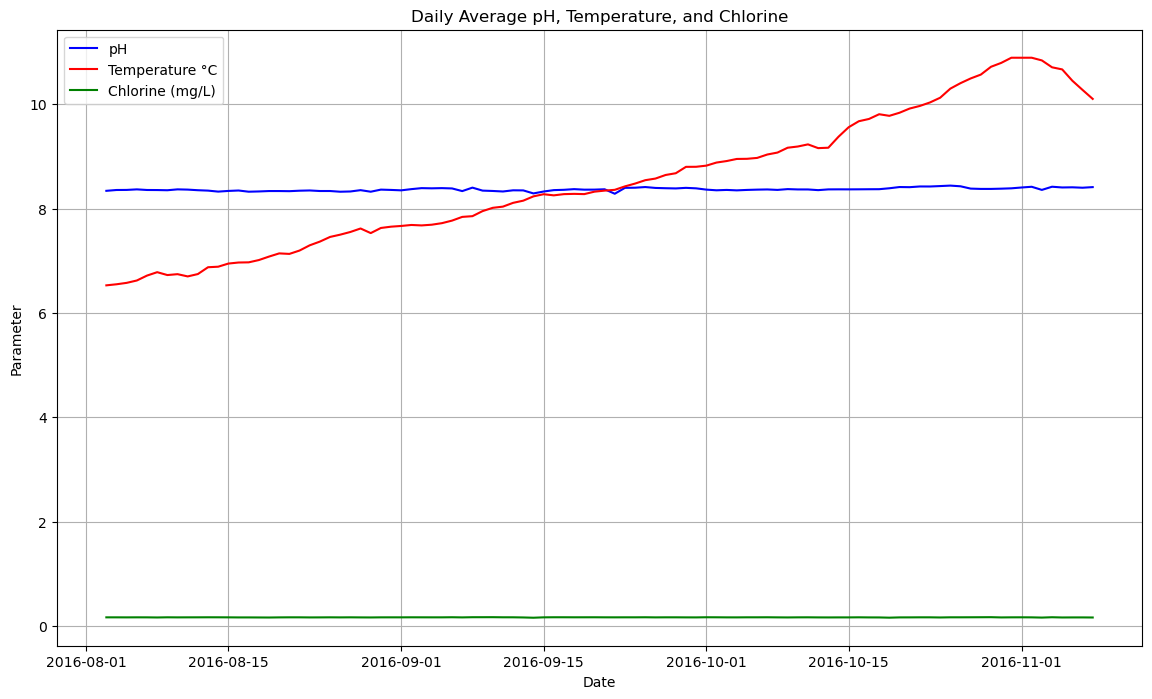

In [53]:
daily_avg= water_df.groupby('Date').agg({'pH': 'mean','Tp': 'mean','Cl': 'mean'}).reset_index()
plt.figure(figsize=(14, 8))
plt.plot(daily_avg['Date'], daily_avg['pH'], label='pH', color='blue')
plt.plot(daily_avg['Date'], daily_avg['Tp'], label='Temperature °C', color='red')
plt.plot(daily_avg['Date'], daily_avg['Cl'], label='Chlorine (mg/L)', color='green')
plt.xlabel('Date')
plt.ylabel('Parameter')
plt.title('Daily Average pH, Temperature, and Chlorine')
plt.legend()
plt.grid()
plt.show()

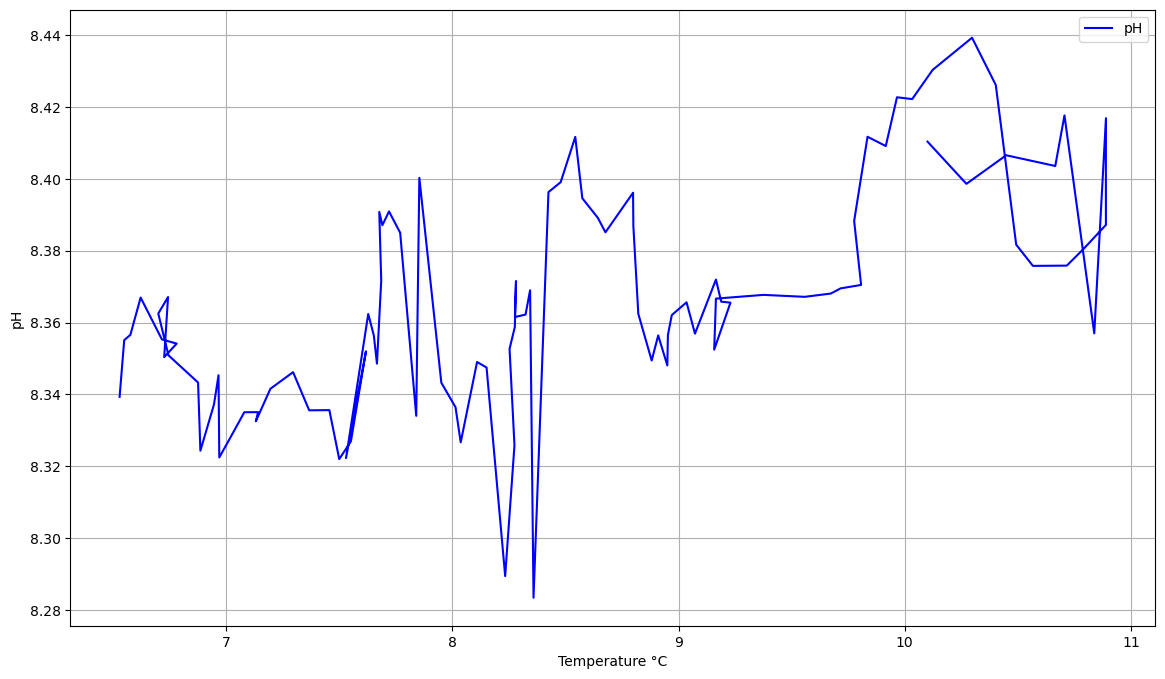

In [33]:
plt.figure(figsize=(14, 8))
plt.plot( daily_avg['Tp'], daily_avg['pH'], label='pH', color='Blue')
plt.xlabel('Temperature °C')
plt.ylabel('pH')

plt.legend()
plt.grid()
plt.show()

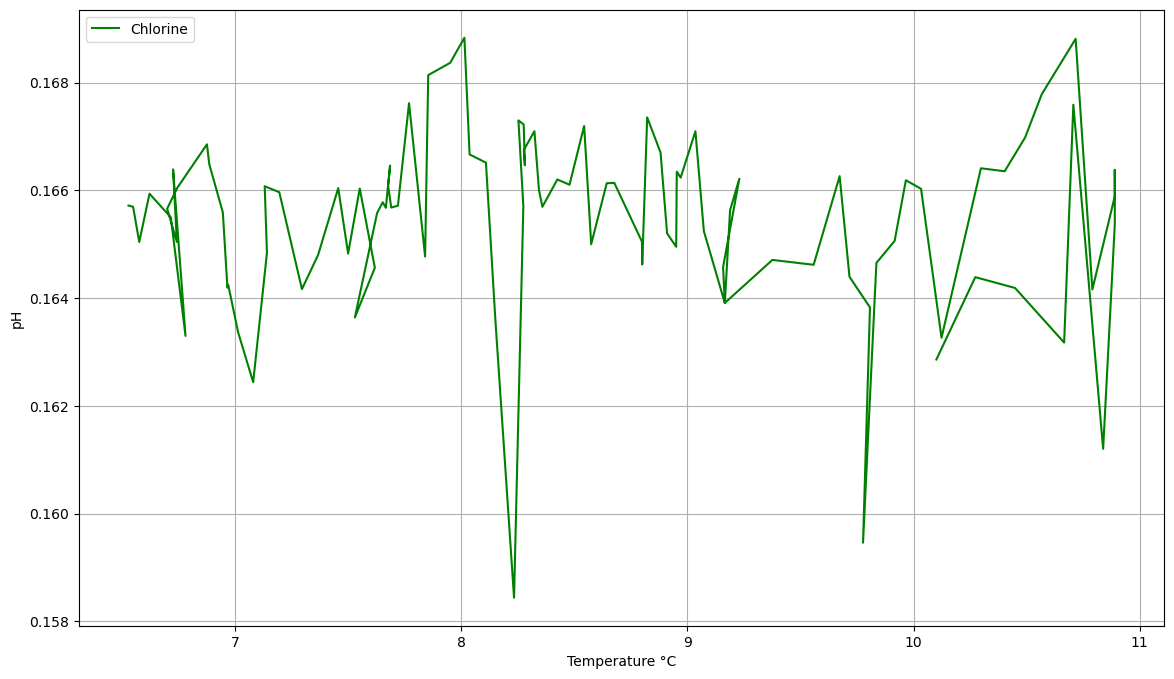

In [35]:
plt.figure(figsize=(14, 8))
plt.plot( daily_avg['Tp'], daily_avg['Cl'], label='Chlorine', color='green')
plt.xlabel('Temperature °C')
plt.ylabel('pH')

plt.legend()
plt.grid()
plt.show()

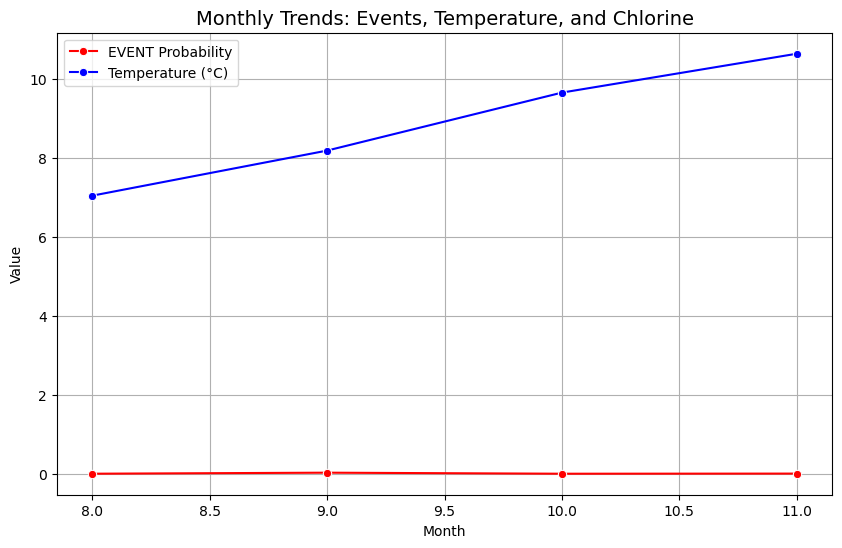

In [37]:
monthly_avg = water_df.groupby('Month').agg({'EVENT': 'mean', 'Tp': 'mean', 'Cl': 'mean'})
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_avg, x='Month', y='EVENT', marker='o', label='EVENT Probability', color='red')
sns.lineplot(data=monthly_avg, x='Month', y='Tp', marker='o', label='Temperature (°C)', color='blue')
plt.xlabel("Month")
plt.ylabel("Value")
plt.title("Monthly Trends: Events, Temperature, and Chlorine", fontsize=14)
plt.legend()
plt.grid()
plt.show()

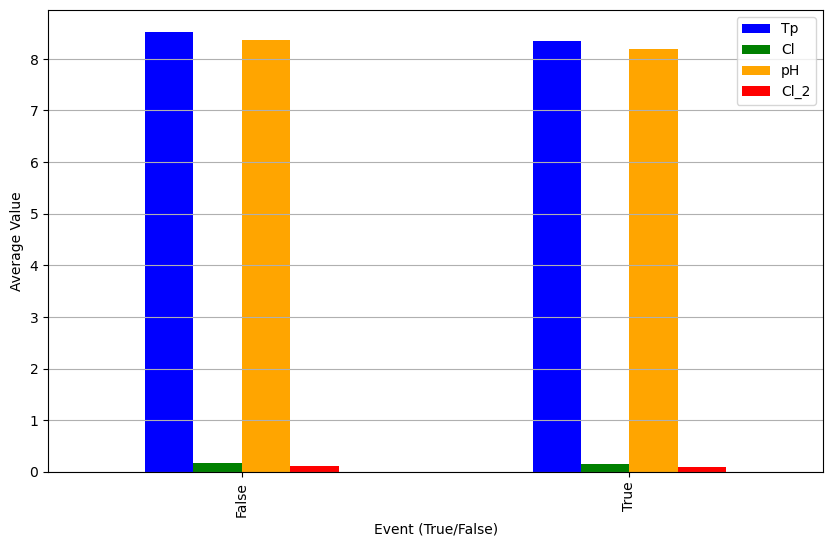

In [67]:
event_avg = water_df.groupby('EVENT').agg({'Tp': 'mean', 'Cl': 'mean', 'pH': 'mean','Cl_2':'mean'})
event_avg.plot(kind='bar', figsize=(10, 6), color=['blue', 'green', 'orange','red'])
plt.xlabel("Event (True/False)")
plt.ylabel("Average Value")
plt.grid(axis='y')
plt.show()

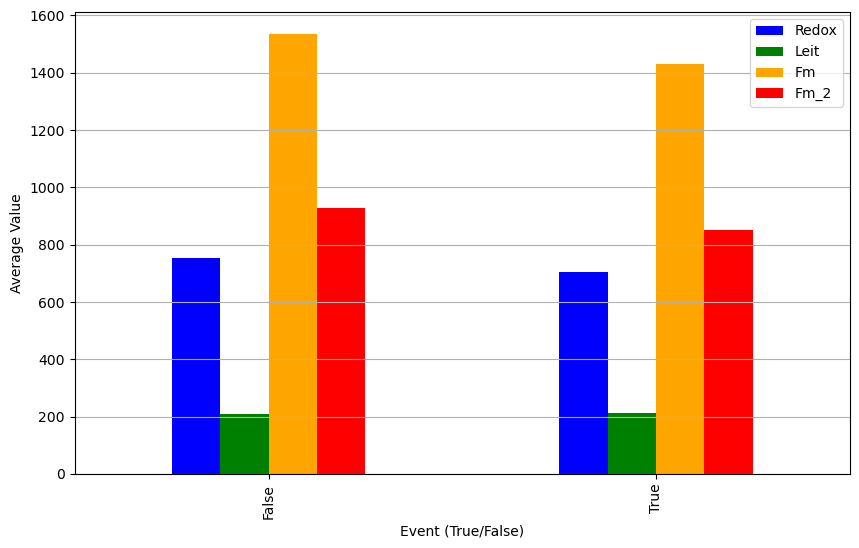

In [71]:
event_avg = water_df.groupby('EVENT').agg({'Redox': 'mean', 'Leit': 'mean', 'Fm': 'mean','Fm_2': 'mean'})
event_avg.plot(kind='bar', figsize=(10, 6), color=['blue', 'green', 'orange','red'])
plt.xlabel("Event (True/False)")
plt.ylabel("Average Value")
plt.grid(axis='y')
plt.show()

# EVENT BY MONTH
### it can be seen that september has the most events occured

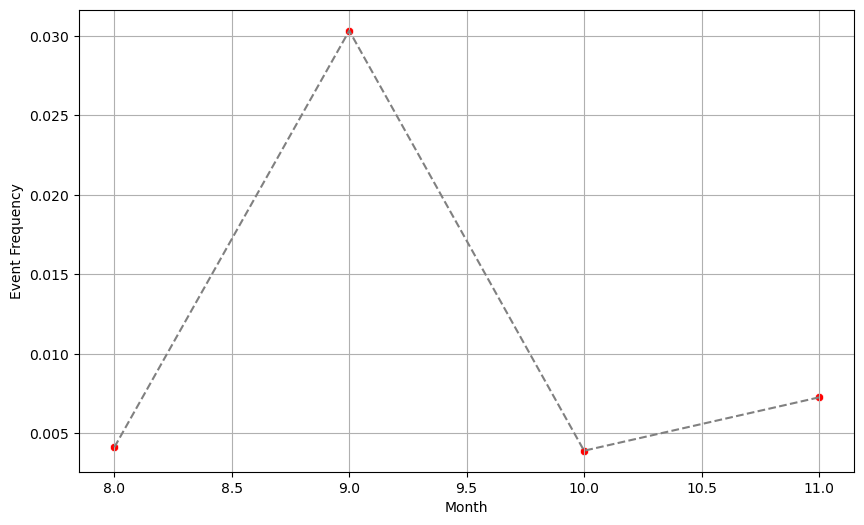

In [75]:
event_freq = water_df.groupby('Month')['EVENT'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=event_freq, x='Month', y='EVENT', color='red')
plt.plot(event_freq['Month'], event_freq['EVENT'], linestyle='--', color='gray')
plt.xlabel("Month")
plt.ylabel("Event Frequency")
plt.grid()
plt.show()

In [45]:
event_freq

,Month,EVENT
0,8,0.004118
1,9,0.030324
2,10,0.003898
3,11,0.007254


# EVENT BY Hours

In [48]:
water_df.columns

Index(['Time', 'Tp', 'Cl', 'pH', 'Redox', 'Leit', 'Trueb', 'Cl_2', 'Fm',
       'Fm_2', 'EVENT', 'Date', 'Time_only', 'Month', 'Hours', 'Day of week'],
      dtype='object')

KeyError: 'Hours'

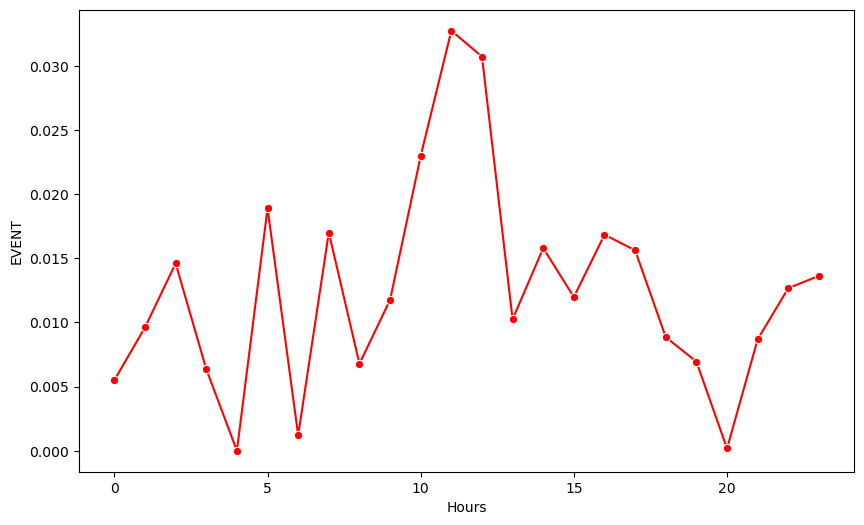

In [83]:
event_freq_date = water_df.groupby('Hours')['EVENT'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=event_freq_date , x='Hours', y='EVENT', marker = 'o' , color='red')
plt.plot(event_freq['Hours'], event_freq['EVENT'], linestyle='--', color='gray')
plt.xlabel('Hours')
plt.ylabel("Event Frequency")
plt.grid()
plt.show()

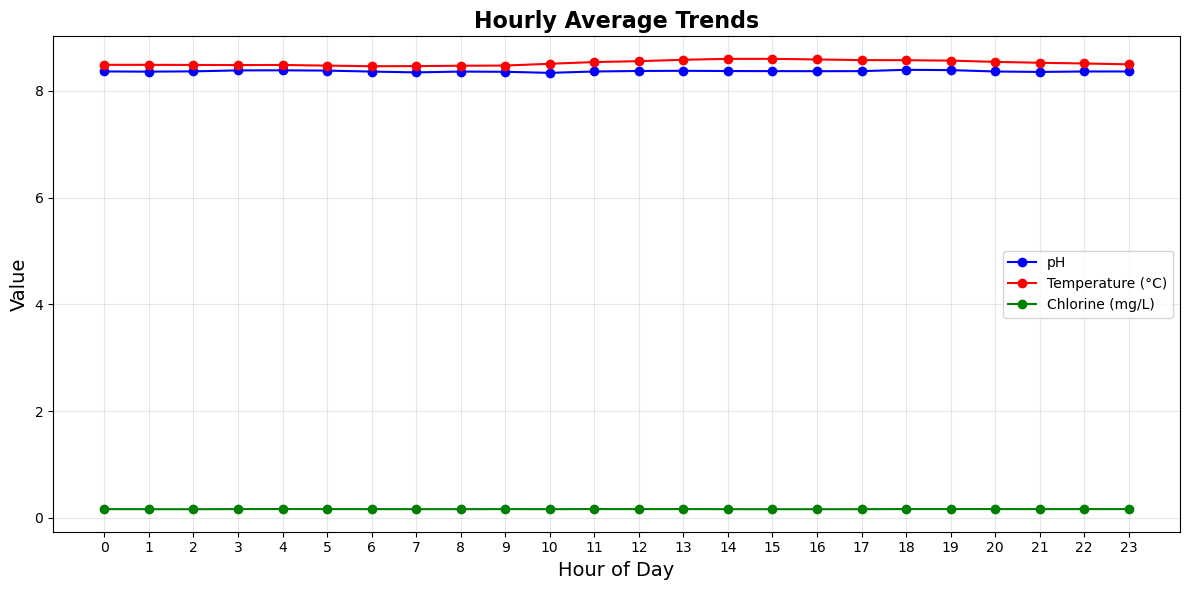

In [62]:
hourly_avg = water_df.groupby('Hours').agg({'pH': 'mean', 'Tp': 'mean', 'Cl': 'mean'}).reset_index()
plt.figure(figsize=(12, 6))
plt.plot(hourly_avg['Hours'], hourly_avg['pH'], marker='o', label='pH', color='blue')
plt.plot(hourly_avg['Hours'], hourly_avg['Tp'], marker='o', label='Temperature (°C)', color='red')
plt.plot(hourly_avg['Hours'], hourly_avg['Cl'], marker='o', label='Chlorine (mg/L)', color='green')

plt.title("Hourly Average Trends", fontsize=16, fontweight='bold')
plt.xlabel("Hour of Day", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.xticks(range(0, 24))
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#### Is there a time of the day when the quality of the water is the worst?
##### no, its constant during the day


array([<Axes: xlabel='Hours'>, <Axes: xlabel='Hours'>,
       <Axes: xlabel='Hours'>, <Axes: xlabel='Hours'>,
       <Axes: xlabel='Hours'>, <Axes: xlabel='Hours'>], dtype=object)

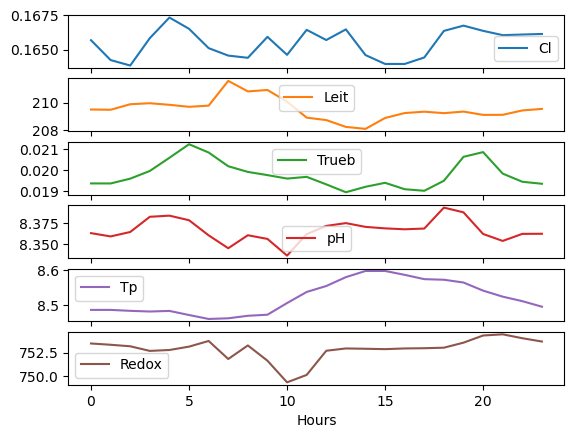

In [69]:
hours_df = water_df.groupby('Hours').agg({'Cl':'mean','Leit':'mean','Trueb':'mean','pH':'mean','Tp':'mean','Redox':'mean'})
hours_df.plot(subplots = True)

#### Is there a day of the week when the quality of the water is the worst? 


array([<Axes: xlabel='Day of week'>, <Axes: xlabel='Day of week'>,
       <Axes: xlabel='Day of week'>, <Axes: xlabel='Day of week'>,
       <Axes: xlabel='Day of week'>, <Axes: xlabel='Day of week'>],
      dtype=object)

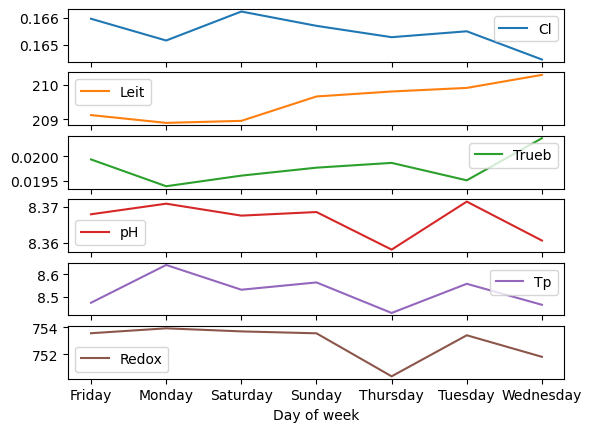

In [71]:
day_df = water_df.groupby('Day of week').agg({'Cl':'mean','Leit':'mean','Trueb':'mean','pH':'mean','Tp':'mean','Redox':'mean'})
day_df.plot(subplots=True)

<Axes: xlabel='Hours'>

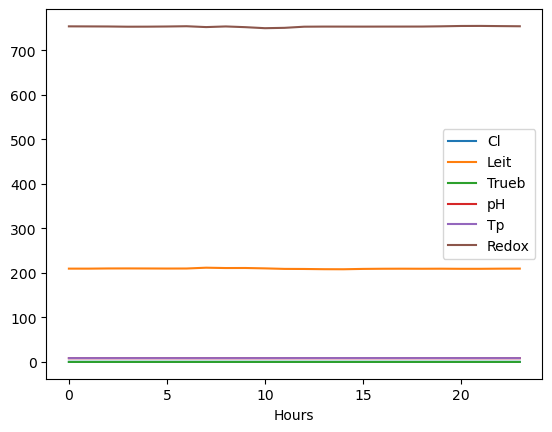

In [260]:
hours_df = water_df.groupby('Hours').agg({'Cl':'mean','Leit':'mean','Trueb':'mean','pH':'mean','Tp':'mean','Redox':'mean'})
hours_df.plot()

# Our Dataset vs Optimal Values

In [197]:


optimal_values_1 = {
    "Tp": (10, 15),      
    "pH": (6.5, 8.5),
}

   

optimal_values_2 = {
        "Redox": (500, 800),
        "Leit": (50, 800),   
                    }

optimal_values_3 =  {
        "Cl": (0.2, 0.8),  
        "Trueb": (0, 1)  
                    }

In [199]:
means = pd.DataFrame(water_df[['Tp','pH']].mean())
means_2 =pd.DataFrame(water_df[['Redox','Leit']].mean())
means_3 =pd.DataFrame(water_df[[ 'Cl','Trueb']].mean())


<Axes: >

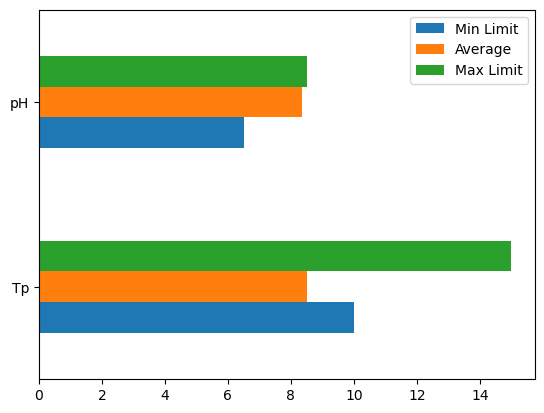

In [201]:
comparison = pd.concat([pd.DataFrame(optimal_values_1).T ,means], axis = 1) 
comparison.columns = ['Min Limit', 'Max Limit', 'Average']
comparison = comparison[['Min Limit', 'Average', 'Max Limit']]  
comparison.plot(kind='barh')

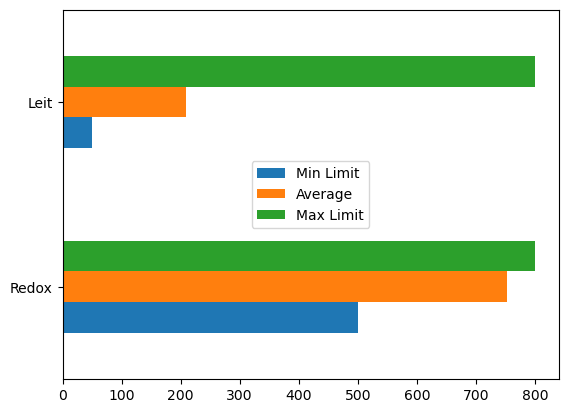

In [203]:
comparison_2 = pd.concat([pd.DataFrame(optimal_values_2).T ,means_2], axis = 1) 
comparison_2.columns = ['Min Limit', 'Max Limit', 'Average']
comparison_2= comparison_2[['Min Limit', 'Average', 'Max Limit']]  
comparison_2.plot(kind='barh')
plt.legend(loc = 'center')

<Axes: >

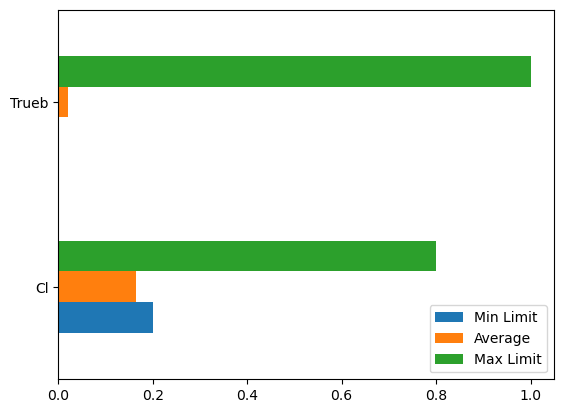

In [205]:
comparison_3= pd.concat([pd.DataFrame(optimal_values_3).T ,means_3], axis = 1) 
comparison_3.columns = ['Min Limit', 'Max Limit', 'Average']
comparison_3 = comparison_3[['Min Limit', 'Average', 'Max Limit']]  
comparison_3.plot(kind='barh')

# Days with most events occured

In [207]:
top_event_days = water_df["Date"][water_df["EVENT"] == True].value_counts().head()
top_event_days_df =water_df[water_df["Date"].isin(top_event_days.index)]
top_event_days_df.reset_index()


,index,Time,Tp,Cl,pH,Redox,Leit,Trueb,Cl_2,Fm,Fm_2,EVENT,Date,Time_only,Month,Hours,Day of week
0,49691,2016-09-07 00:00:00,7.7,0.17,8.39,752.0,211.0,0.026,0.110,1668.0,829.0,False,2016-09-07,00:00:00,9,0,Wednesday
1,49692,2016-09-07 00:01:00,7.7,0.17,8.39,752.0,211.0,0.026,0.111,1662.0,826.0,False,2016-09-07,00:01:00,9,0,Wednesday
2,49693,2016-09-07 00:02:00,7.7,0.17,8.39,753.0,211.0,0.026,0.113,1689.0,818.0,False,2016-09-07,00:02:00,9,0,Wednesday
3,49694,2016-09-07 00:03:00,7.7,0.17,8.39,752.0,211.0,0.026,0.113,1645.0,826.0,False,2016-09-07,00:03:00,9,0,Wednesday
4,49695,2016-09-07 00:04:00,7.7,0.17,8.39,752.0,211.0,0.026,0.114,1659.0,832.0,False,2016-09-07,00:04:00,9,0,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,78486,2016-09-26 23:55:00,8.6,0.17,8.37,755.0,214.0,0.015,0.106,1627.0,847.0,False,2016-09-26,23:55:00,9,23,Monday
7196,78487,2016-09-26 23:56:00,8.6,0.17,8.37,755.0,214.0,0.015,0.108,1599.0,847.0,False,2016-09-26,23:56:00,9,23,Monday
7197,78488,2016-09-26 23:57:00,8.6,0.17,8.37,755.0,214.0,0.015,0.106,1659.0,847.0,False,2016-09-26,23:57:00,9,23,Monday
7198,78489,2016-09-26 23:58:00,8.6,0.17,8.37,755.0,211.0,0.015,0.106,1593.0,846.0,False,2016-09-26,23:58:00,9,23,Monday


### 2016-09-14	is the day with most events occured
##### and the table above shows the top  dates 

## Exploring reasons behind EVENTS

### made a for loop to make a histogram for all variables. and I only picked the ones with meaning and high correlation

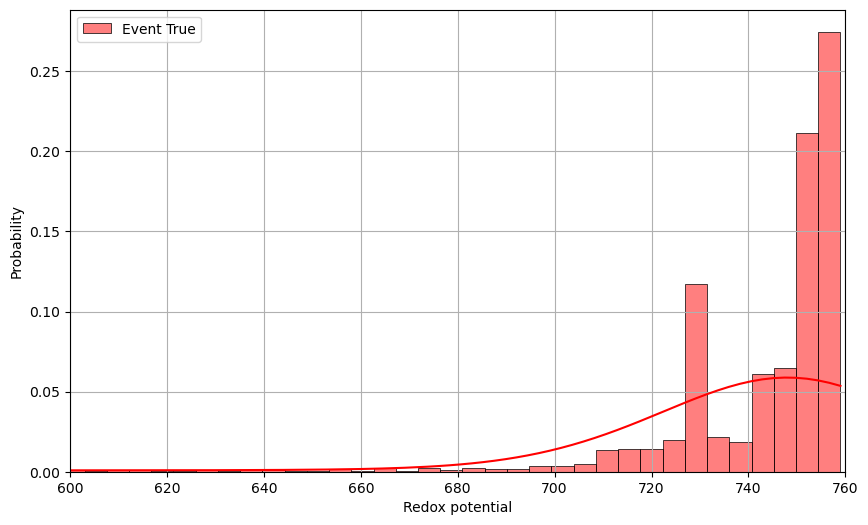

In [139]:
event_true = water_df[water_df["EVENT"] == True]
event_false = water_df[water_df["EVENT"] == False]
plt.figure(figsize=(10, 6))
sns.histplot(event_true['Redox'],color='red', label='Event True',kde=True, stat='probability')
plt.xlim(600,760)
plt.legend()
plt.xlabel('Redox potential')
plt.grid()
plt.show()

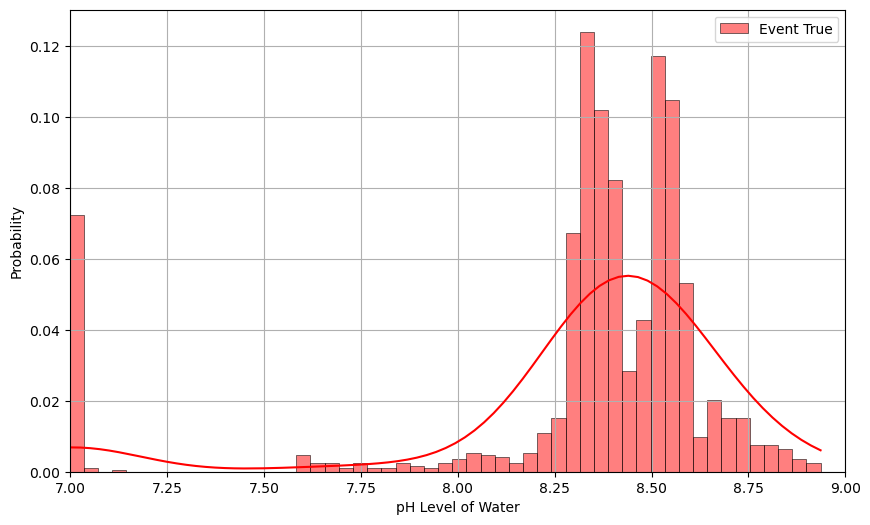

In [141]:
event_true = water_df[water_df["EVENT"] == True]
event_false = water_df[water_df["EVENT"] == False]
plt.figure(figsize=(10, 6))
sns.histplot(event_true['pH'],color='red', label='Event True',kde=True, stat='probability')
plt.xlim(7,9)
plt.legend()
plt.xlabel('pH Level of Water')
plt.grid()
plt.show()

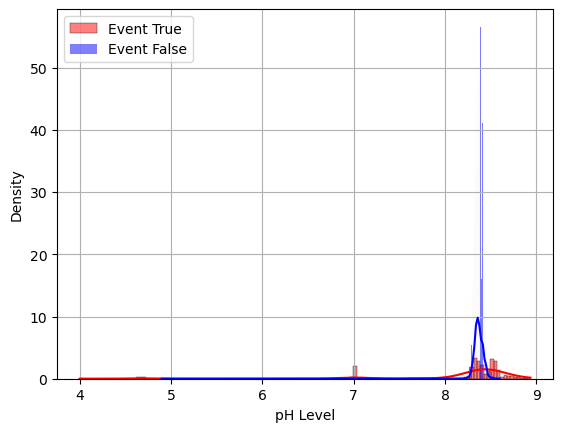

In [214]:
sns.histplot(event_true['pH'], color='red', label='Event True', kde=True, stat='density')
sns.histplot(event_false['pH'], color='blue', label='Event False', kde=True, stat='density')
plt.legend()
plt.xlabel('pH Level')
plt.grid()
plt.show()

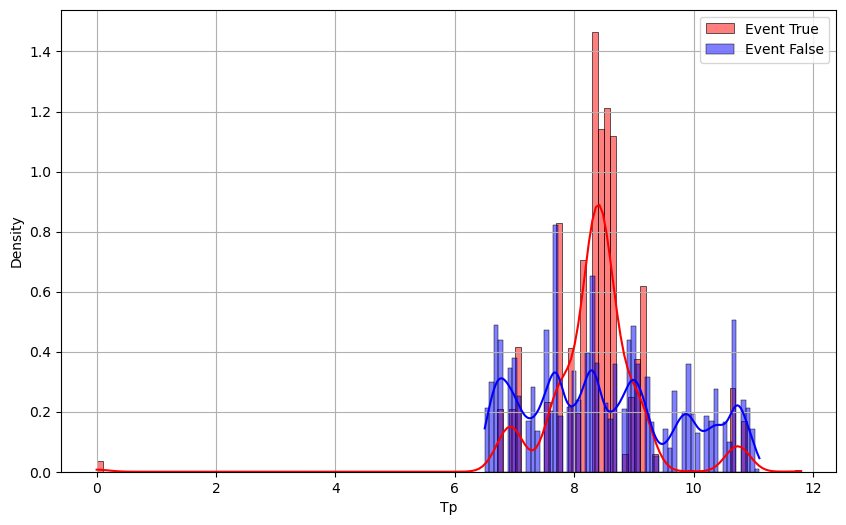

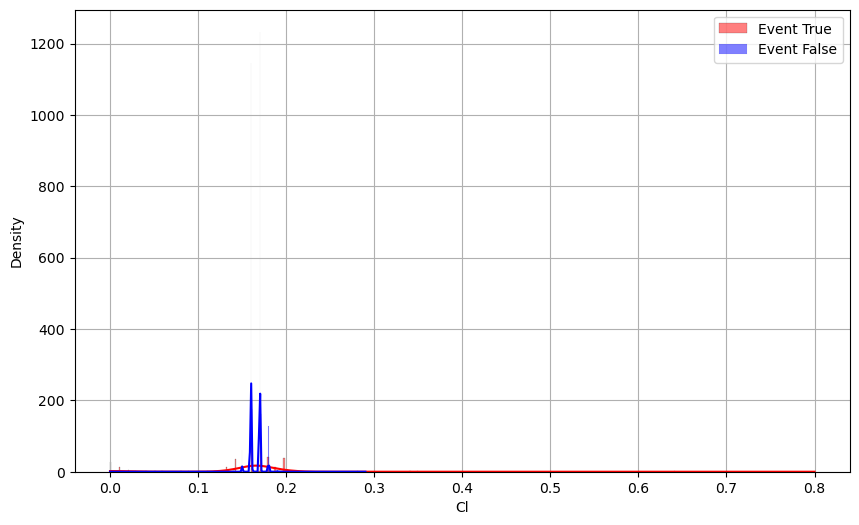

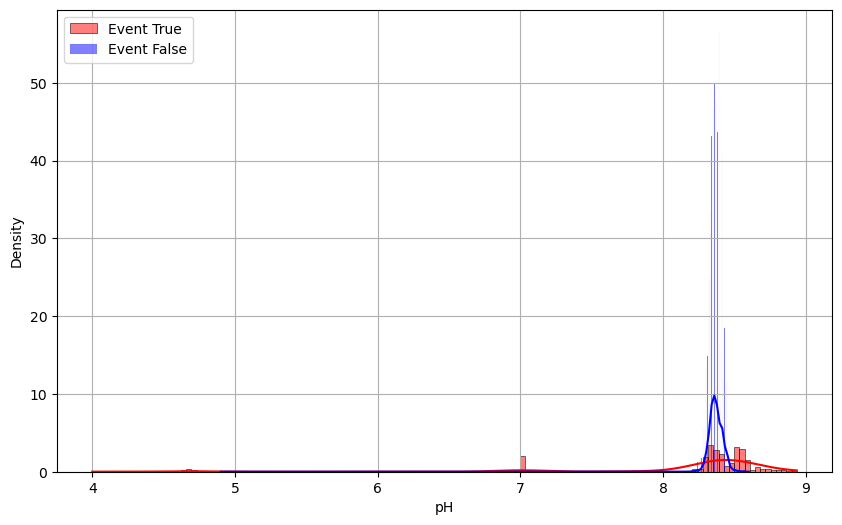

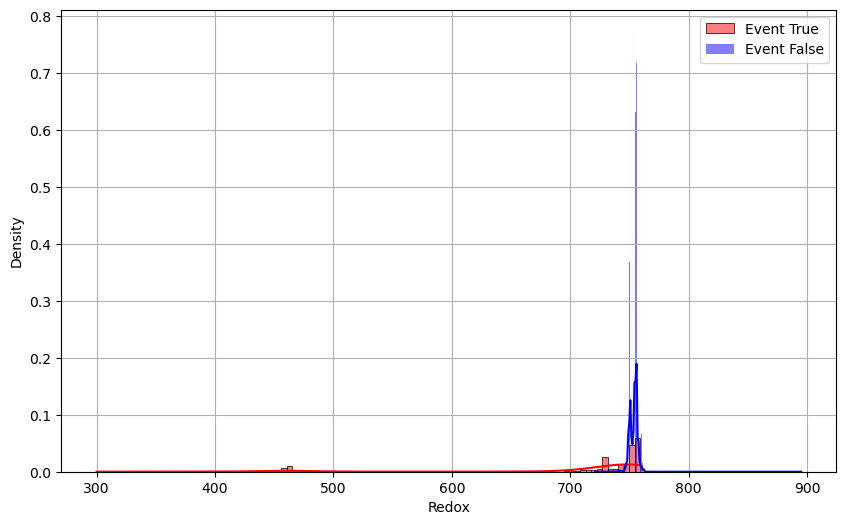

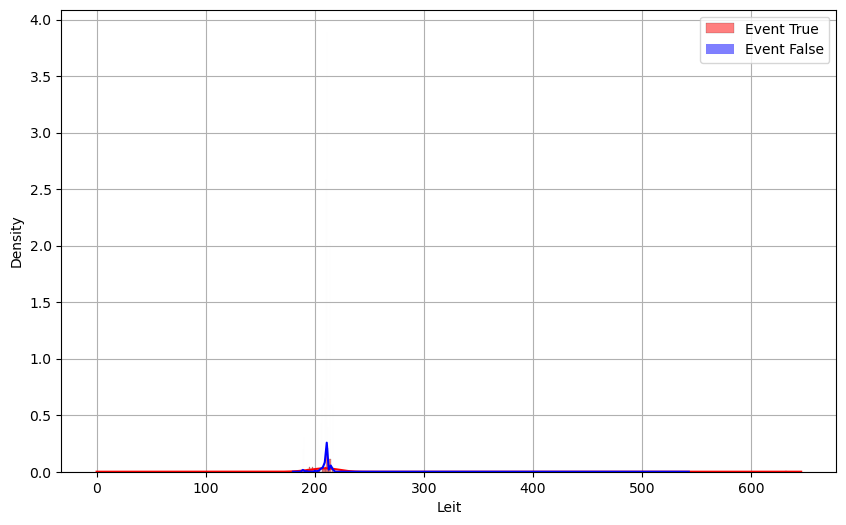

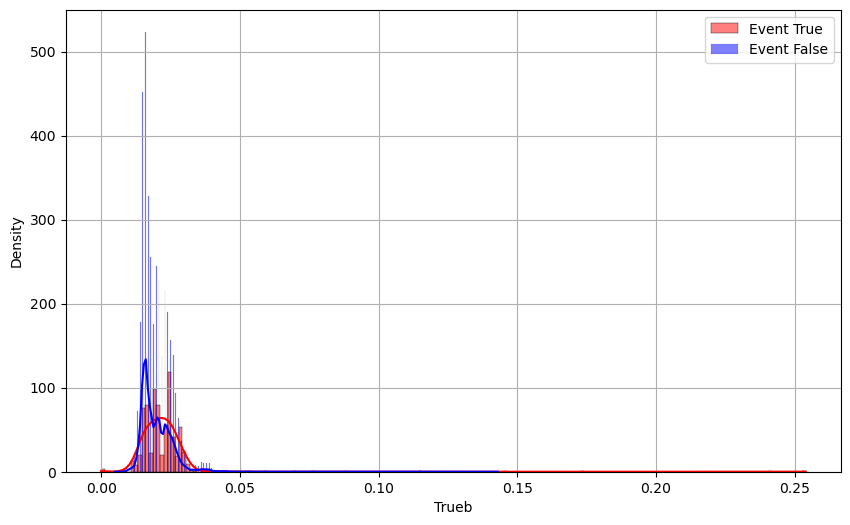

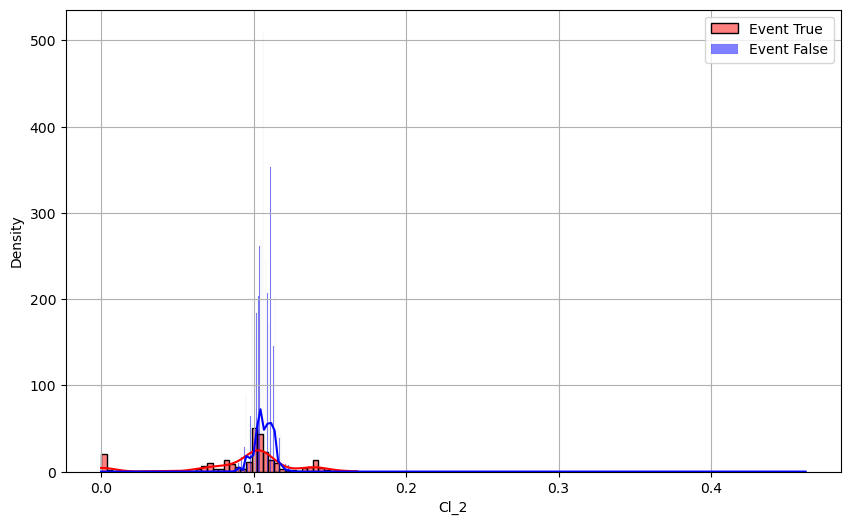

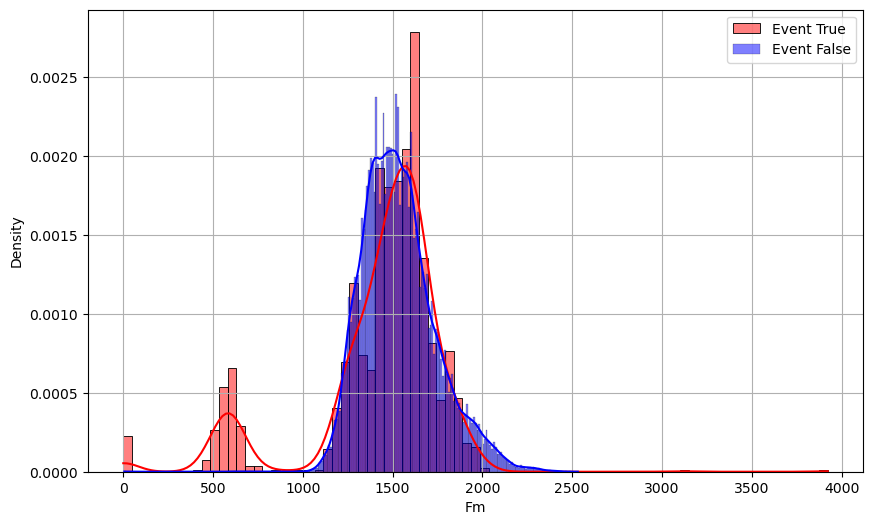

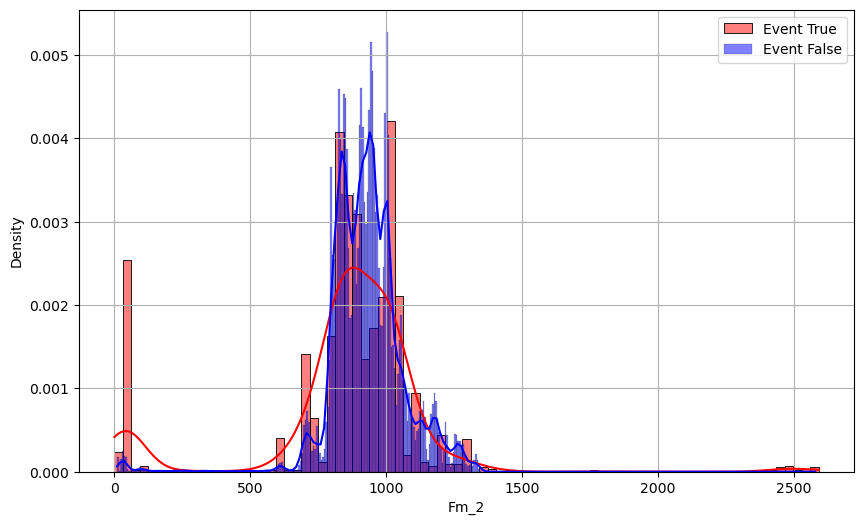

In [86]:
event_true = water_df[water_df["EVENT"] == True]
event_false = water_df[water_df["EVENT"] == False]
parameters = ["Tp", "Cl", "pH", "Redox", "Leit", "Trueb", "Cl_2", "Fm", "Fm_2"]
for x in parameters:
    plt.figure(figsize=(10, 6))
    sns.histplot(event_true[x],color='red', label='Event True',kde=True, stat='density')
    sns.histplot(event_false[x],color='blue', label='Event False', kde=True, stat='density')
    plt.legend()
    plt.grid()
    plt.show()

## For Temp most events occur in the range 8-9 C
## Most events occur in the Cl range of 0.1 to 0.25 mg/L
## Redox is out of ideal range . 280 column only < 700, 138000 have a redox  > 700
## most data have acceptable pH

In [81]:
water_df.columns

Index(['Time', 'Tp', 'Cl', 'pH', 'Redox', 'Leit', 'Trueb', 'Cl_2', 'Fm',
       'Fm_2', 'EVENT', 'Date', 'Time_only', 'Month', 'Hours', 'Day of week'],
      dtype='object')

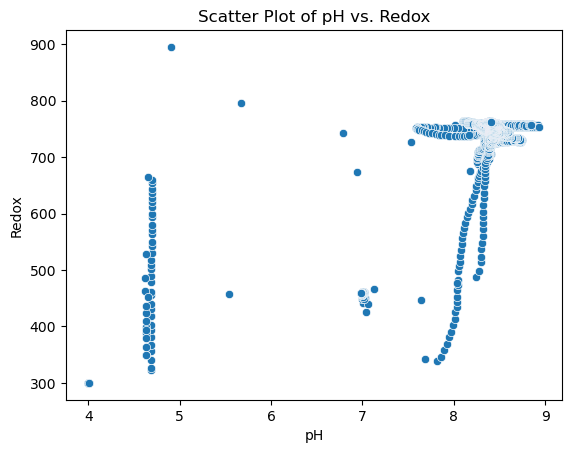

In [82]:
sns.scatterplot(data=water_df, x='pH', y='Redox')
plt.title('Scatter Plot of pH vs. Redox')
plt.show()

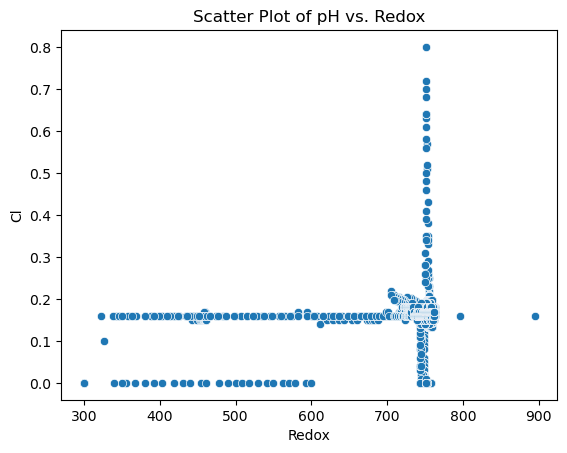

In [83]:
sns.scatterplot(data=water_df, x='Redox', y='Cl')
plt.title('Scatter Plot of pH vs. Redox')
plt.show()

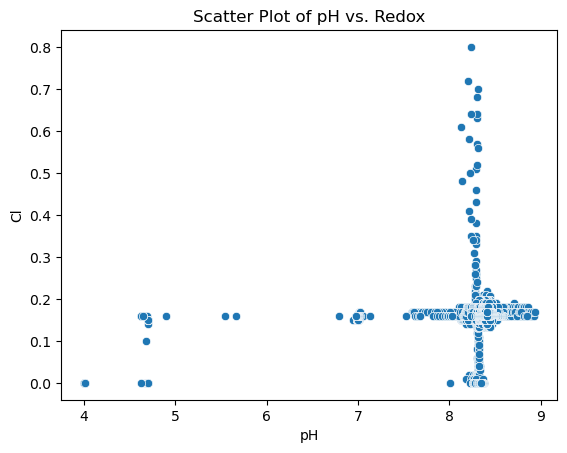

In [84]:
sns.scatterplot(data=water_df, x='pH', y='Cl')
plt.title('Scatter Plot of pH vs. Redox')
plt.show()

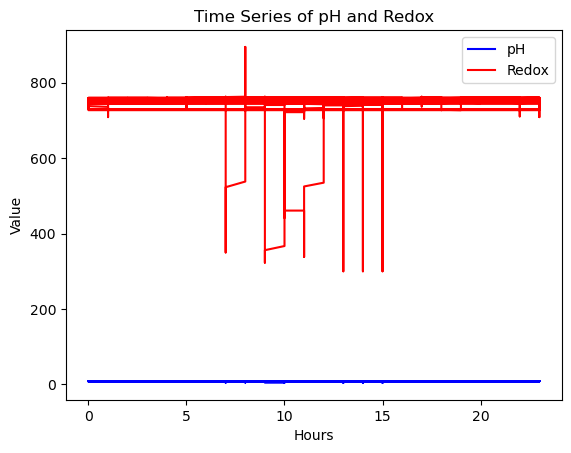

In [85]:
plt.plot(water_df['Hours'], water_df['pH'], label='pH', color='blue')
plt.plot(water_df['Hours'], water_df['Redox'], label='Redox', color='red')
plt.xlabel('Hours')
plt.ylabel('Value')
plt.title('Time Series of pH and Redox')
plt.legend()
plt.show()


In [87]:
f = water_df["Redox"] < 700
water_df[f]

,Time,Tp,Cl,pH,Redox,Leit,Trueb,Cl_2,Fm,Fm_2,EVENT,Date,Time_only,Month,Hours,Day of week
50254,2016-09-07 09:23:00,7.7,0.16,7.64,446.0,122.0,0.025,0.004,1549.0,806.0,True,2016-09-07,09:23:00,9,9,Wednesday
50255,2016-09-07 09:24:00,7.7,0.16,7.03,450.0,415.0,0.025,0.002,1587.0,812.0,True,2016-09-07,09:24:00,9,9,Wednesday
50256,2016-09-07 09:25:00,7.7,0.16,7.01,454.0,381.0,0.025,0.000,1576.0,814.0,True,2016-09-07,09:25:00,9,9,Wednesday
50257,2016-09-07 09:26:00,7.7,0.16,7.00,457.0,323.0,0.025,0.000,1579.0,814.0,True,2016-09-07,09:26:00,9,9,Wednesday
50258,2016-09-07 09:27:00,7.7,0.16,7.00,458.0,285.0,0.025,0.000,1587.0,811.0,True,2016-09-07,09:27:00,9,9,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132325,2016-11-03 08:14:00,10.7,0.16,8.34,679.0,196.0,0.021,0.103,1726.0,1000.0,True,2016-11-03,08:14:00,11,8,Thursday
132326,2016-11-03 08:15:00,10.7,0.16,8.34,685.0,196.0,0.020,0.102,1700.0,990.0,True,2016-11-03,08:15:00,11,8,Thursday
132327,2016-11-03 08:16:00,10.7,0.16,8.34,689.0,196.0,0.020,0.103,1753.0,991.0,True,2016-11-03,08:16:00,11,8,Thursday
132328,2016-11-03 08:17:00,10.7,0.16,8.35,695.0,196.0,0.020,0.103,1700.0,995.0,True,2016-11-03,08:17:00,11,8,Thursday


In [309]:
f = (water_df["pH"] >= 6.5 ) & (water_df["pH"] <=8.5)
water_df[f]


,Time,Tp,Cl,pH,Redox,Leit,Trueb,Cl_2,Fm,Fm_2,EVENT,Date,Time_only,Month,Hours,Day of week
0,2016-08-03 11:49:00,6.5,0.17,8.36,749.0,211.0,0.011,0.118,1677.0,695.0,False,2016-08-03,11:49:00,8,11,Wednesday
1,2016-08-03 11:50:00,6.5,0.17,8.36,749.0,211.0,0.011,0.118,1561.0,696.0,False,2016-08-03,11:50:00,8,11,Wednesday
2,2016-08-03 11:51:00,6.5,0.17,8.35,749.0,211.0,0.011,0.117,1581.0,696.0,False,2016-08-03,11:51:00,8,11,Wednesday
3,2016-08-03 11:52:00,6.5,0.17,8.35,749.0,211.0,0.011,0.118,1579.0,693.0,False,2016-08-03,11:52:00,8,11,Wednesday
4,2016-08-03 11:53:00,6.5,0.17,8.35,749.0,211.0,0.011,0.118,1567.0,689.0,False,2016-08-03,11:53:00,8,11,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139561,2016-11-08 08:50:00,10.1,0.16,8.41,762.0,189.0,0.023,0.105,1799.0,924.0,False,2016-11-08,08:50:00,11,8,Tuesday
139562,2016-11-08 08:51:00,10.1,0.17,8.41,762.0,190.0,0.022,0.106,1835.0,927.0,False,2016-11-08,08:51:00,11,8,Tuesday
139563,2016-11-08 08:52:00,10.1,0.17,8.41,762.0,190.0,0.022,0.106,1807.0,924.0,False,2016-11-08,08:52:00,11,8,Tuesday
139564,2016-11-08 08:53:00,10.1,0.17,8.41,762.0,190.0,0.022,0.106,1799.0,930.0,False,2016-11-08,08:53:00,11,8,Tuesday


## The relationship b/n pH and Redox

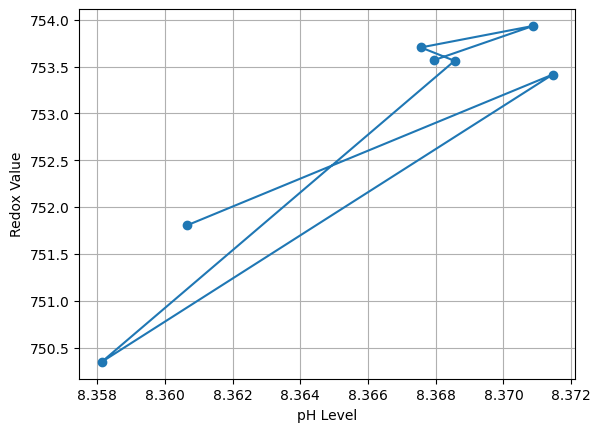

In [167]:
plt.plot( water_df.groupby('Day of week').agg({'pH': 'mean'}), water_df.groupby('Day of week').agg({'Redox': 'mean'}), marker='o')
plt.grid()
# plt.xlim(7,9)
plt.xlabel('pH Level')
plt.ylabel('Redox Value')
# plt.ylim(600,800)
plt.show()
